# data load

In [9]:
import pybaseball
import pickle
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load and uncompress.
with gzip.open('tb_data_merged.pkl','rb') as f:
    data = pickle.load(f)

In [20]:
barrel_data = data[data['launch_speed_angle']==6]
barrel_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,Season,GB%,FB%,IFFB%,HR/FB
116,FF,2024-09-21,97.9,1.58,5.78,"Montgomery, Mason",676914,682254,field_out,hit_into_play,...,1,0.95,0.68,-0.68,54.7,2024,0.298,0.496,0.109,0.102
347,SI,2024-09-19,90.3,-0.62,6.03,"Littell, Zack",641933,641793,field_out,hit_into_play,...,1,1.64,1.25,1.25,39.8,2024,0.358,0.469,0.151,0.261
414,SL,2024-09-18,86.8,-0.52,5.55,"Bigge, Hunter",657136,685801,field_out,hit_into_play,...,1,3.27,-0.59,-0.59,52.7,2024,0.435,0.359,0.161,0.110
478,FF,2024-09-18,92.7,-0.9,6.0,"Pepiot, Ryan",596115,686752,home_run,hit_into_play,...,1,1.1,0.8,0.8,45.5,2024,0.344,0.426,0.077,0.077
505,SL,2024-09-18,89.4,-1.18,6.04,"Pepiot, Ryan",671213,686752,double,hit_into_play,...,1,2.05,-0.3,0.3,39.2,2024,0.422,0.385,0.077,0.250


In [45]:
# data[(data['launch_speed_angle']!=6)&(data['events']=='home_run')]['launch_speed_angle'].value_counts()

# Discribe

In [30]:
barrel_data[['hit_distance_sc','launch_speed','launch_angle','GB%','FB%','HR/FB']].describe()

,hit_distance_sc,launch_speed,launch_angle,GB%,FB%,HR/FB
count,966.0,966.0,966.0,966.000000,966.000000,966.000000
mean,387.857143,104.489855,26.186335,0.411955,0.384494,0.158207
std,34.380955,3.894705,5.680296,0.064024,0.064519,0.066803
min,209.0,97.5,9.0,0.228000,0.163000,0.000000
25%,375.0,101.6,22.0,0.366000,0.341000,0.111000
50%,393.0,104.2,26.0,0.412000,0.381500,0.150000
75%,408.0,107.0,30.0,0.452000,0.431000,0.194000
max,464.0,118.3,43.0,0.639000,0.567000,0.444000


# hist

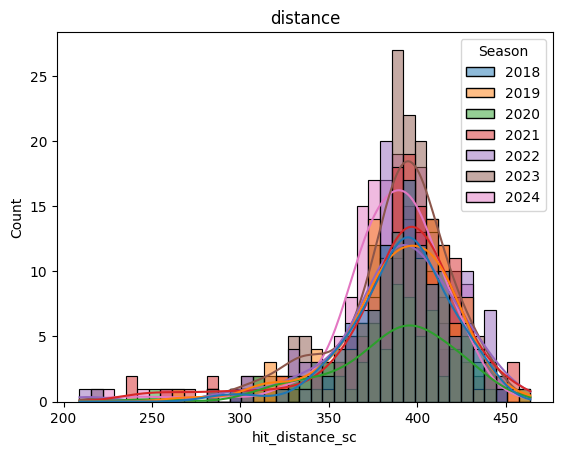

In [22]:
sns.histplot(data=barrel_data,x='hit_distance_sc',hue='Season',kde=True,palette='tab10')
plt.title('distance')
plt.show()

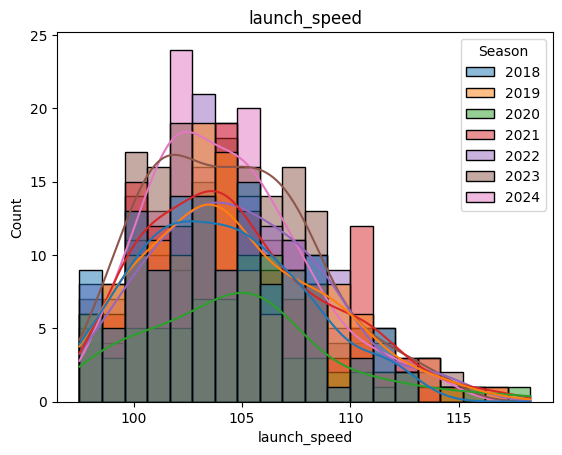

In [23]:
sns.histplot(data=barrel_data,x='launch_speed',hue='Season',kde=True,palette='tab10')
plt.title('launch_speed')
plt.show()

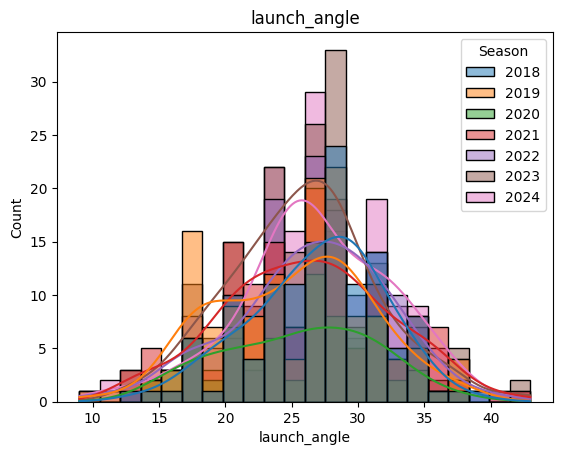

In [29]:
sns.histplot(data=barrel_data,x='launch_angle',hue='Season',kde=True,palette='tab10')
plt.title('launch_angle')
plt.show()

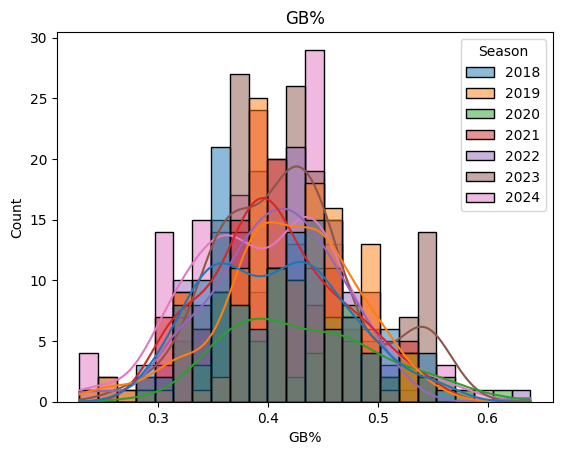

In [46]:
sns.histplot(data=barrel_data,x='GB%',hue='Season',kde=True,palette='tab10')
plt.title('GB%')
plt.show()

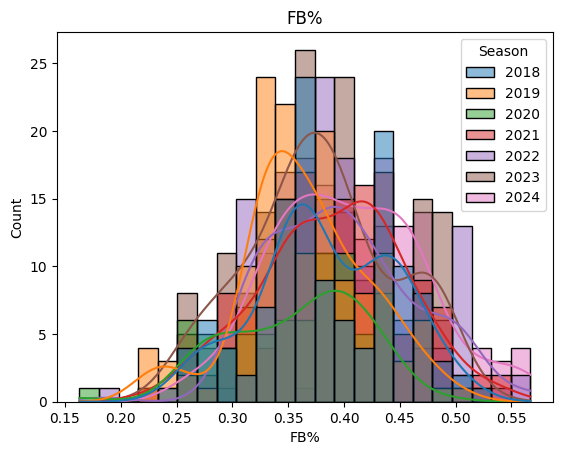

In [26]:
sns.histplot(data=barrel_data,x='FB%',hue='Season',kde=True,palette='tab10')
plt.title('FB%')
plt.show()

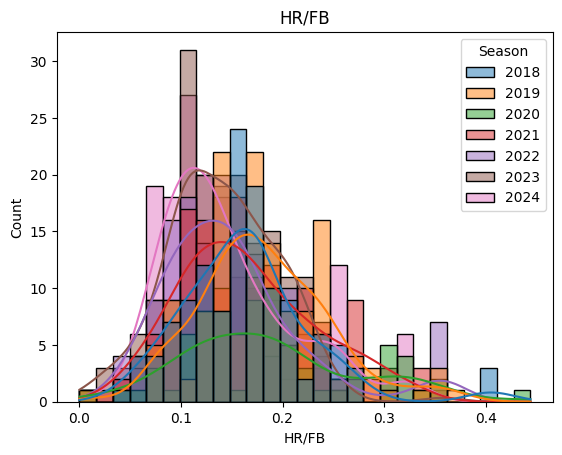

In [25]:
sns.histplot(data=barrel_data,x='HR/FB',hue='Season',kde=True,palette='tab10')
plt.title('HR/FB')
plt.show()

# corr

In [47]:
barrel_data[['HR/FB','FB%','GB%','hit_distance_sc']].corr()

,HR/FB,FB%,GB%,hit_distance_sc
HR/FB,1.000000,0.081550,-0.106734,-0.081620
FB%,0.081550,1.000000,-0.869198,0.029580
GB%,-0.106734,-0.869198,1.000000,-0.005233
hit_distance_sc,-0.081620,0.029580,-0.005233,1.000000


In [48]:
barrel_data[(barrel_data['launch_speed']<=106)&(barrel_data['launch_speed']>=102)&(barrel_data['launch_angle']<=29)&(barrel_data['launch_angle']>=23)][['HR/FB','FB%','GB%','hit_distance_sc']].corr()

,HR/FB,FB%,GB%,hit_distance_sc
HR/FB,1.000000,-0.001781,0.049905,-0.034123
FB%,-0.001781,1.000000,-0.893704,-0.068941
GB%,0.049905,-0.893704,1.000000,0.071853
hit_distance_sc,-0.034123,-0.068941,0.071853,1.000000


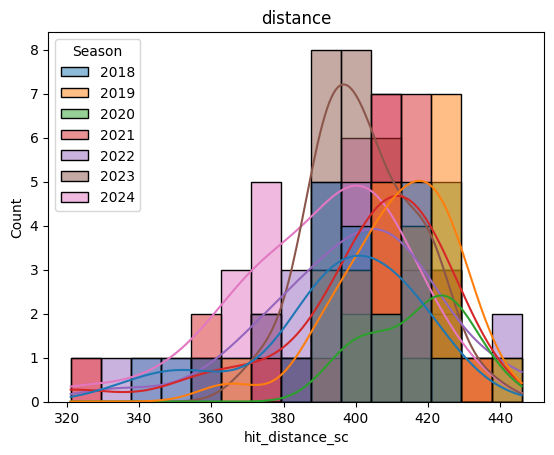

In [37]:
tmp_data = barrel_data[(barrel_data['launch_speed']<=106)&(barrel_data['launch_speed']>=102)&(barrel_data['launch_angle']<=29)&(barrel_data['launch_angle']>=23)]
sns.histplot(data=tmp_data,x='hit_distance_sc',hue='Season',kde=True,palette='tab10')
plt.title('distance')
plt.show()